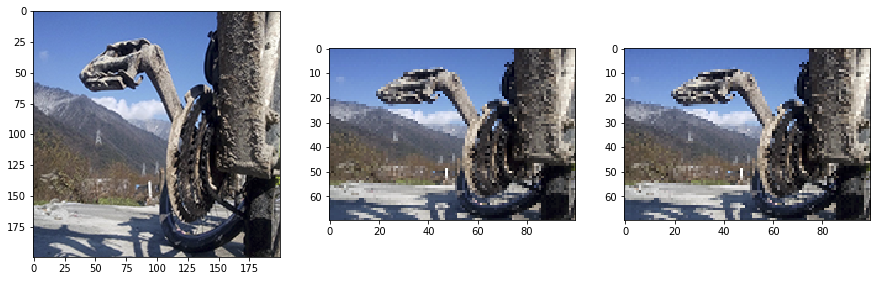

In [86]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


def show(images,cols=None):
    if cols==None:
        cols=len(images)
    rows=np.ceil(len(images)/float(cols)) #注意python2是板除取整，需将cols转成float
    
    base_size=5
    plt.figure(figsize=[base_size*cols,base_size*2])
    for i,image in enumerate(images):
        plt.subplot(rows,cols,i+1)
        plt.imshow(image,cmap='gray')
    plt.show()


#读取图片    
image_raw_data=tf.gfile.FastGFile('images/bike.png','r').read()
image=tf.image.decode_jpeg(image_raw_data)

# #先将 255 -> 1
image_float=tf.image.convert_image_dtype(image,dtype=tf.float32)

sess=tf.Session()

images=[]
images.append(image_float.eval(session=sess))

#调整图像尺寸
for i in range(2):
    resized=tf.image.resize_images(image_float,[70,100],method=i)
    images.append(resized.eval(session=sess))

show(images)

In [32]:
for i  in range(2,4):
    resized=tf.image.resize_images(image_float,[70,100],method=i).eval(session=sess)
    print resized.min(),resized.max()
    
    
# -0.0197478 1.02396 负数 ？

-0.0197478 1.02396
0.000588233 0.982451


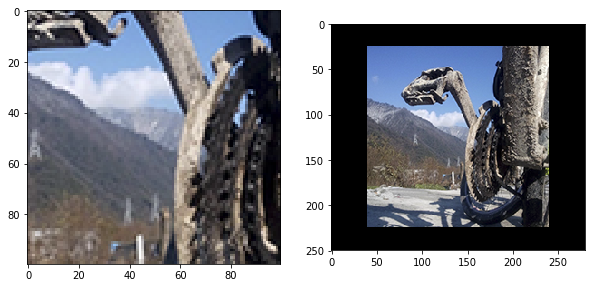

In [34]:
#通过裁剪填充调整图像尺寸

#调整后图像小于原来图像，自动街区图像剧中部分
croped=tf.image.resize_image_with_crop_or_pad(image_float,100,100)

#调整后图像大于原始图像，周围自动填充0
padded=tf.image.resize_image_with_crop_or_pad(image_float,250,280)

show([croped.eval(session=sess),padded.eval(session=sess)])

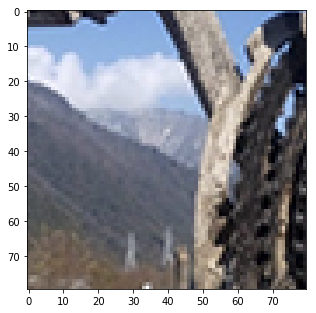

In [40]:
#通过比例缩放

central_cropped=tf.image.central_crop(image_float,0.4)
show([central_cropped.eval(session=sess)])

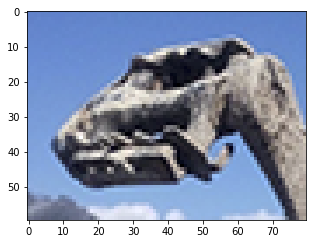

In [44]:
#裁剪指定区域
"""
Signature: tf.image.crop_to_bounding_box(
    image, offset_height, offset_width, target_height, target_width
)
"""
#切出自行车脚踏板
bounding_boxed=tf.image.crop_to_bounding_box(image_float,15,30,60,80)
show([bounding_boxed.eval(session=sess)])

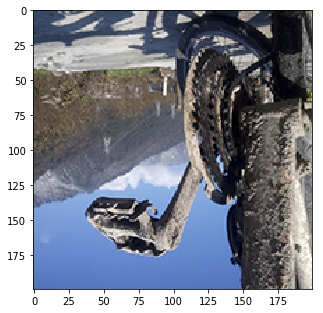

In [53]:
#图像翻转
flipped=tf.image.random_flip_up_down(image_float)
show([flipped.eval(session=sess)])

### 图像的色彩调整
```
tf.image.adjust_brightness
tf.image.adjust_contrast
tf.image.adjust_gamma
tf.image.adjust_hue
tf.image.adjust_saturation
```

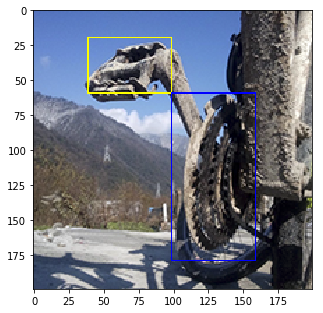

In [55]:
#处理标注框

#注意boxes是存储的多张图片的标注框信息
#参数 小于1，代表图像相对位置 [y_min,x_min,y_max,x_max]
#标注自行车脚踏板和大齿盘
boxes=tf.constant([[[0.1,0.2,0.3,0.5],[0.3,0.5,0.9,0.8]], ])
batch_images=[image_float]
result=tf.image.draw_bounding_boxes(batch_images,boxes=boxes)
show([result[0].eval(session=sess)])

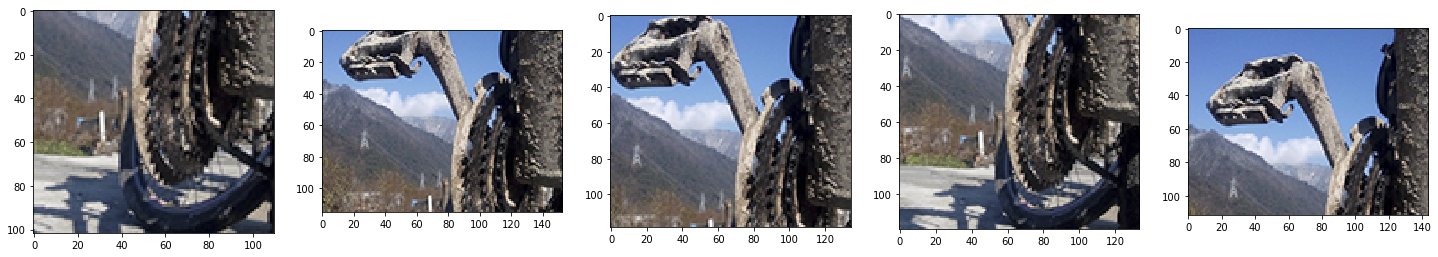

In [93]:
#随机截取图像

#限定截取图像必须要包含的区域（兴趣点）
boxes=tf.constant([[[0.1,0.2,0.3,0.5],[0.3,0.5,0.9,0.8]], ])
#min_object_covered=0.4 兴趣部分至少占所截取图像的百分比

begin,size,bbox_for_draw=tf.image.sample_distorted_bounding_box(
    tf.shape(image_float),bounding_boxes=boxes,min_object_covered=0.4
)

batch_images=[image_float,]
image_with_box=tf.image.draw_bounding_boxes(batch_images,bbox_for_draw)

distorted_image=tf.slice(image_float,begin,size)

images=[]
for i in range(5):
    tmp = distorted_image.eval(session=sess)
    images.append(tmp)
    
show(images)